# 1. Import Essential Python Libs

In [1]:
#Import necessary python libraries
import numpy as np #algebric computations
import pandas as pd #data processing/handling
import matplotlib.pyplot as plt # data visualization
%matplotlib inline 
import seaborn as sns #for visualization
import warnings #need to suppress warnings
warnings.filterwarnings("ignore")

# 2. Data Reading

In [2]:
loan_df = pd.read_csv('./loan/loan.csv')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### Observation
1. There are 39,717 rows and 111 column

# 3. Date Cleaning: Remove Redundant or non-relevant column

## 3.1 Remove Columns where all entries are NULL

In [4]:
loan_df1 = loan_df.dropna(axis='columns',how='all')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## 3.2 Missing Value Treatment

In [5]:
loan_df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### Observation: 
It seems almost all entries are missing for following columns: mths_since_last_delinq, mths_since_last_record, next_pymnt_d
#### Decision
let's drop these columns

In [6]:

loan_df1 = loan_df1.drop(columns=['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'])
loan_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

## 3.3 Understand each data points, fix data types and decide relevance based on context

#### Observation
* Based on data_dictionary.xls, id & member_id seems unique identifier for book keeping

#### Assumption
Following columns may be relevant only after grant of application based on data_dictionary given
* funded_amnt, funded_amnt_inv, delinq_2yrs, out_prncp*, total_pymnt*, total_rec*, recoveries, collection_recovery_fee, last_pymnt*, last_credit_pull_d,collections_12_mths_ex_med,  

#### Decision
Let's drop those

In [7]:
loan_df2 = loan_df1.drop(columns=['id','member_id','delinq_2yrs','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                                 'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                                 'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','collections_12_mths_ex_med',
                                 'funded_amnt','funded_amnt_inv'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 39717 non-null  int64  
 1   term                      39717 non-null  object 
 2   int_rate                  39717 non-null  object 
 3   installment               39717 non-null  float64
 4   grade                     39717 non-null  object 
 5   sub_grade                 39717 non-null  object 
 6   emp_title                 37258 non-null  object 
 7   emp_length                38642 non-null  object 
 8   home_ownership            39717 non-null  object 
 9   annual_inc                39717 non-null  float64
 10  verification_status       39717 non-null  object 
 11  issue_d                   39717 non-null  object 
 12  loan_status               39717 non-null  object 
 13  pymnt_plan                39717 non-null  object 
 14  url   

In [8]:
loan_df2['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

#### Observation
Column 'term' seems like ordered categorical type
#### Decision
Let's convert data type as 'category'

In [9]:
loan_df2['term'] = loan_df2['term'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  object  
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  object  
 5   sub_grade                 39717 non-null  object  
 6   emp_title                 37258 non-null  object  
 7   emp_length                38642 non-null  object  
 8   home_ownership            39717 non-null  object  
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  object  
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  object  
 13  pymnt_plan                39717 non-null  obje

In [10]:
loan_df2['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

#### Observation
* % character is changing type of values
#### Descision
* Need to drop '%' char in order to make use of this column as continuous variable for analysis purpose

In [11]:
#drop last char i.e. % from each value
loan_df2['int_rate'] = loan_df2['int_rate'].apply(lambda x: 0 if (x=='0%') else float(x[:-1])) 
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  object  
 5   sub_grade                 39717 non-null  object  
 6   emp_title                 37258 non-null  object  
 7   emp_length                38642 non-null  object  
 8   home_ownership            39717 non-null  object  
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  object  
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  object  
 13  pymnt_plan                39717 non-null  obje

In [12]:
loan_df2['grade']

0        B
1        C
2        C
3        C
4        B
        ..
39712    A
39713    C
39714    A
39715    A
39716    E
Name: grade, Length: 39717, dtype: object

#### Observation
* Data values seems like ordered categorical variable
#### Assumption/Desision
* it shall be useful to change data type as 'category'

In [13]:
loan_df2['grade'] = loan_df2['grade'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  object  
 6   emp_title                 37258 non-null  object  
 7   emp_length                38642 non-null  object  
 8   home_ownership            39717 non-null  object  
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  object  
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  object  
 13  pymnt_plan                39717 non-null  obje

In [14]:
loan_df2['sub_grade']

0        B2
1        C4
2        C5
3        C1
4        B5
         ..
39712    A4
39713    C1
39714    A4
39715    A2
39716    E2
Name: sub_grade, Length: 39717, dtype: object

#### Observation
* Data values seems like ordered categorical variable
#### Assumption/Desision
* it shall be useful to change data type as 'category'

In [15]:
loan_df2['sub_grade'] = loan_df2['sub_grade'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  object  
 7   emp_length                38642 non-null  object  
 8   home_ownership            39717 non-null  object  
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  object  
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  object  
 13  pymnt_plan                39717 non-null  obje

In [16]:
loan_df2['emp_title']
loan_df2['emp_title'].isna().sum()

2459

In [17]:
loan_df2['emp_title'] = loan_df2['emp_title'].fillna("Missing_Emp_Title")

#### Observation
* Values seems like a category
#### Decision
* let's change the type as 'category' for future analysis needs

In [18]:
loan_df2['emp_title'] = loan_df2['emp_title'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 39717 non-null  category
 7   emp_length                38642 non-null  object  
 8   home_ownership            39717 non-null  object  
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  object  
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  object  
 13  pymnt_plan                39717 non-null  obje

In [19]:
loan_df2['emp_length']
loan_df2['emp_length'].isna().sum()

1075

In [20]:
loan_df2['emp_length'] = loan_df2['emp_length'].fillna("Missing_emp_length")

#### Observation
* Values seem like ordered categorical type
#### Decision
* Change data type as 'category'

In [21]:
loan_df2['emp_length'] = loan_df2['emp_length'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 39717 non-null  category
 7   emp_length                39717 non-null  category
 8   home_ownership            39717 non-null  object  
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  object  
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  object  
 13  pymnt_plan                39717 non-null  obje

In [22]:
loan_df2['home_ownership']

0            RENT
1            RENT
2            RENT
3            RENT
4            RENT
           ...   
39712    MORTGAGE
39713        RENT
39714    MORTGAGE
39715    MORTGAGE
39716         OWN
Name: home_ownership, Length: 39717, dtype: object

#### Observation
* Values seem like categorical
#### Decision
* Let's change the data type as 'category'

In [23]:
loan_df2['home_ownership'] = loan_df2['home_ownership'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 39717 non-null  category
 7   emp_length                39717 non-null  category
 8   home_ownership            39717 non-null  category
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  object  
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  object  
 13  pymnt_plan                39717 non-null  obje

In [24]:
loan_df2['verification_status']

0               Verified
1        Source Verified
2           Not Verified
3        Source Verified
4        Source Verified
              ...       
39712       Not Verified
39713       Not Verified
39714       Not Verified
39715       Not Verified
39716       Not Verified
Name: verification_status, Length: 39717, dtype: object

#### Observation
* Data seems like categorical in nature
#### Decision
* Let's change the type as 'category'

In [25]:
loan_df2['verification_status'] = loan_df2['verification_status'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 39717 non-null  category
 7   emp_length                39717 non-null  category
 8   home_ownership            39717 non-null  category
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  category
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  object  
 13  pymnt_plan                39717 non-null  obje

#### Assumption: 
* column 'issue_d' is related to start of loan; it may not be relevant
#### Decision
* let's leave it asis for now

In [26]:
loan_df2['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: object

#### Observation
* Values seems like category
* Current loan entries belong to in progress loan; we may need to drop these rows

#### Decision
* let's convert as 'category'

In [26]:
loan_df2 = loan_df2[~(loan_df2['loan_status']=='Current')]
loan_df2['loan_status'] = loan_df2['loan_status'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 38577 non-null  int64   
 1   term                      38577 non-null  category
 2   int_rate                  38577 non-null  float64 
 3   installment               38577 non-null  float64 
 4   grade                     38577 non-null  category
 5   sub_grade                 38577 non-null  category
 6   emp_title                 38577 non-null  category
 7   emp_length                38577 non-null  category
 8   home_ownership            38577 non-null  category
 9   annual_inc                38577 non-null  float64 
 10  verification_status       38577 non-null  category
 11  issue_d                   38577 non-null  object  
 12  loan_status               38577 non-null  category
 13  pymnt_plan                38577 non-null  obje

In [27]:
loan_df2['pymnt_plan'].value_counts()

n    38577
Name: pymnt_plan, dtype: int64

#### Observation
* all values are same

#### Decision
Let's drop this column

In [28]:
loan_df2 = loan_df2.drop(columns=['pymnt_plan'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 38577 non-null  int64   
 1   term                      38577 non-null  category
 2   int_rate                  38577 non-null  float64 
 3   installment               38577 non-null  float64 
 4   grade                     38577 non-null  category
 5   sub_grade                 38577 non-null  category
 6   emp_title                 38577 non-null  category
 7   emp_length                38577 non-null  category
 8   home_ownership            38577 non-null  category
 9   annual_inc                38577 non-null  float64 
 10  verification_status       38577 non-null  category
 11  issue_d                   38577 non-null  object  
 12  loan_status               38577 non-null  category
 13  url                       38577 non-null  obje

In [29]:
loan_df2['url'].value_counts()

https://lendingclub.com/browse/loanDetail.action?loan_id=695930     1
https://lendingclub.com/browse/loanDetail.action?loan_id=878629     1
https://lendingclub.com/browse/loanDetail.action?loan_id=1063700    1
https://lendingclub.com/browse/loanDetail.action?loan_id=461556     1
https://lendingclub.com/browse/loanDetail.action?loan_id=846913     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=515463     1
https://lendingclub.com/browse/loanDetail.action?loan_id=766947     1
https://lendingclub.com/browse/loanDetail.action?loan_id=762525     1
https://lendingclub.com/browse/loanDetail.action?loan_id=1011087    1
https://lendingclub.com/browse/loanDetail.action?loan_id=447842     1
Name: url, Length: 38577, dtype: int64

#### Observation
* Seems like being used for tracking the loan application

#### Assumption
* Not useful for analyzing the application

#### Decision
* Let's drop this column

In [30]:
loan_df2 = loan_df2.drop(columns=['url'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 38577 non-null  int64   
 1   term                      38577 non-null  category
 2   int_rate                  38577 non-null  float64 
 3   installment               38577 non-null  float64 
 4   grade                     38577 non-null  category
 5   sub_grade                 38577 non-null  category
 6   emp_title                 38577 non-null  category
 7   emp_length                38577 non-null  category
 8   home_ownership            38577 non-null  category
 9   annual_inc                38577 non-null  float64 
 10  verification_status       38577 non-null  category
 11  issue_d                   38577 non-null  object  
 12  loan_status               38577 non-null  category
 13  desc                      26050 non-null  obje

In [31]:
loan_df2['desc'].value_counts()

#### Observation
* Details are description about loan

#### Assumption
* These details are elaboraton beyond purpose of loan; it may be out of scope for EDA

#### Decision
* let's drop this column

In [32]:
loan_df2 = loan_df2.drop(columns=['desc'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 38577 non-null  int64   
 1   term                      38577 non-null  category
 2   int_rate                  38577 non-null  float64 
 3   installment               38577 non-null  float64 
 4   grade                     38577 non-null  category
 5   sub_grade                 38577 non-null  category
 6   emp_title                 38577 non-null  category
 7   emp_length                38577 non-null  category
 8   home_ownership            38577 non-null  category
 9   annual_inc                38577 non-null  float64 
 10  verification_status       38577 non-null  category
 11  issue_d                   38577 non-null  object  
 12  loan_status               38577 non-null  category
 13  purpose                   38577 non-null  obje

In [33]:
loan_df2['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

#### Observation
* Seems like category

#### Decision
* Let's change the type as 'category'

In [34]:
loan_df2['purpose'] = loan_df2['purpose'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 38577 non-null  int64   
 1   term                      38577 non-null  category
 2   int_rate                  38577 non-null  float64 
 3   installment               38577 non-null  float64 
 4   grade                     38577 non-null  category
 5   sub_grade                 38577 non-null  category
 6   emp_title                 38577 non-null  category
 7   emp_length                38577 non-null  category
 8   home_ownership            38577 non-null  category
 9   annual_inc                38577 non-null  float64 
 10  verification_status       38577 non-null  category
 11  issue_d                   38577 non-null  object  
 12  loan_status               38577 non-null  category
 13  purpose                   38577 non-null  cate

In [35]:
loan_df2['title'].value_counts()

Debt Consolidation                     2090
Debt Consolidation Loan                1620
Personal Loan                           641
Consolidation                           491
debt consolidation                      478
                                       ... 
Expansion of Thriving Business            1
Invisalign Loan                           1
Great Offer                               1
Car Loan 2010                             1
travel processing wedding over seas       1
Name: title, Length: 19297, dtype: int64

#### Observation
* Seems like alternate or similar to 'purpose' column

#### Decision
* Let's drop the column

In [36]:
loan_df2 = loan_df2.drop(columns=['title'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 38577 non-null  int64   
 1   term                      38577 non-null  category
 2   int_rate                  38577 non-null  float64 
 3   installment               38577 non-null  float64 
 4   grade                     38577 non-null  category
 5   sub_grade                 38577 non-null  category
 6   emp_title                 38577 non-null  category
 7   emp_length                38577 non-null  category
 8   home_ownership            38577 non-null  category
 9   annual_inc                38577 non-null  float64 
 10  verification_status       38577 non-null  category
 11  issue_d                   38577 non-null  object  
 12  loan_status               38577 non-null  category
 13  purpose                   38577 non-null  cate

In [37]:
loan_df2[['zip_code','addr_state']]

,zip_code,addr_state
0,860xx,AZ
1,309xx,GA
2,606xx,IL
3,917xx,CA
5,852xx,AZ
...,...,...
39712,802xx,CO
39713,274xx,NC
39714,017xx,MA
39715,208xx,MD


#### Observation
* Column 'zip_code' seems like being kept as confidential
* column 'addr_state' is more of categorical in nature

#### Decision 
* Let's drop 'zip_code'
* convert column 'addr_state' as categorical

In [38]:
loan_df2 = loan_df2.drop(columns=['zip_code'])
loan_df2['addr_state'] = loan_df2['addr_state'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 38577 non-null  int64   
 1   term                      38577 non-null  category
 2   int_rate                  38577 non-null  float64 
 3   installment               38577 non-null  float64 
 4   grade                     38577 non-null  category
 5   sub_grade                 38577 non-null  category
 6   emp_title                 38577 non-null  category
 7   emp_length                38577 non-null  category
 8   home_ownership            38577 non-null  category
 9   annual_inc                38577 non-null  float64 
 10  verification_status       38577 non-null  category
 11  issue_d                   38577 non-null  object  
 12  loan_status               38577 non-null  category
 13  purpose                   38577 non-null  cate

In [39]:
loan_df2['earliest_cr_line'].value_counts()

Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Jun-72      1
Jun-66      1
Nov-65      1
Dec-66      1
Feb-67      1
Name: earliest_cr_line, Length: 524, dtype: int64

#### Observation/Assumption
* Significance of this column need to be explored further

#### Decision
* let's skip for now

In [40]:
loan_df2['inq_last_6mths'].value_counts()
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 38577 non-null  int64   
 1   term                      38577 non-null  category
 2   int_rate                  38577 non-null  float64 
 3   installment               38577 non-null  float64 
 4   grade                     38577 non-null  category
 5   sub_grade                 38577 non-null  category
 6   emp_title                 38577 non-null  category
 7   emp_length                38577 non-null  category
 8   home_ownership            38577 non-null  category
 9   annual_inc                38577 non-null  float64 
 10  verification_status       38577 non-null  category
 11  issue_d                   38577 non-null  object  
 12  loan_status               38577 non-null  category
 13  purpose                   38577 non-null  cate

#### Observation
* columns 'revol_bal' and 'revol_util' seems like opposite of each other based on Data_Dictionary.xls

#### Assumption
* dropping of one of these may not have an impact

#### Decision
* let's drop 'revol_util' column

In [41]:
loan_df2 = loan_df2.drop(columns=['revol_util'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 38577 non-null  int64   
 1   term                      38577 non-null  category
 2   int_rate                  38577 non-null  float64 
 3   installment               38577 non-null  float64 
 4   grade                     38577 non-null  category
 5   sub_grade                 38577 non-null  category
 6   emp_title                 38577 non-null  category
 7   emp_length                38577 non-null  category
 8   home_ownership            38577 non-null  category
 9   annual_inc                38577 non-null  float64 
 10  verification_status       38577 non-null  category
 11  issue_d                   38577 non-null  object  
 12  loan_status               38577 non-null  category
 13  purpose                   38577 non-null  cate

In [42]:
loan_df2['initial_list_status'].value_counts()

f    38577
Name: initial_list_status, dtype: int64

#### Observation
* same value for all rows; it may not be useful

#### Decision
* let's drop this column

In [43]:
loan_df2 = loan_df2.drop(columns='initial_list_status')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 38577 non-null  int64   
 1   term                      38577 non-null  category
 2   int_rate                  38577 non-null  float64 
 3   installment               38577 non-null  float64 
 4   grade                     38577 non-null  category
 5   sub_grade                 38577 non-null  category
 6   emp_title                 38577 non-null  category
 7   emp_length                38577 non-null  category
 8   home_ownership            38577 non-null  category
 9   annual_inc                38577 non-null  float64 
 10  verification_status       38577 non-null  category
 11  issue_d                   38577 non-null  object  
 12  loan_status               38577 non-null  category
 13  purpose                   38577 non-null  cate

In [44]:
loan_df2['policy_code'].value_counts()

1    38577
Name: policy_code, dtype: int64

#### Observation
* all rows has same value viz. 1

#### Decision
* Let's drop this column

In [45]:
loan_df2 = loan_df2.drop(columns='policy_code')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 38577 non-null  int64   
 1   term                      38577 non-null  category
 2   int_rate                  38577 non-null  float64 
 3   installment               38577 non-null  float64 
 4   grade                     38577 non-null  category
 5   sub_grade                 38577 non-null  category
 6   emp_title                 38577 non-null  category
 7   emp_length                38577 non-null  category
 8   home_ownership            38577 non-null  category
 9   annual_inc                38577 non-null  float64 
 10  verification_status       38577 non-null  category
 11  issue_d                   38577 non-null  object  
 12  loan_status               38577 non-null  category
 13  purpose                   38577 non-null  cate

In [46]:
loan_df2['application_type'].value_counts()

INDIVIDUAL    38577
Name: application_type, dtype: int64

#### Observation
* All values are same viz. INDIVIDUAL

#### Decision
* let's drop this column

In [47]:
loan_df2 = loan_df2.drop(columns='application_type')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 38577 non-null  int64   
 1   term                      38577 non-null  category
 2   int_rate                  38577 non-null  float64 
 3   installment               38577 non-null  float64 
 4   grade                     38577 non-null  category
 5   sub_grade                 38577 non-null  category
 6   emp_title                 38577 non-null  category
 7   emp_length                38577 non-null  category
 8   home_ownership            38577 non-null  category
 9   annual_inc                38577 non-null  float64 
 10  verification_status       38577 non-null  category
 11  issue_d                   38577 non-null  object  
 12  loan_status               38577 non-null  category
 13  purpose                   38577 non-null  cate

In [48]:
loan_df2['acc_now_delinq'].value_counts()

0    38577
Name: acc_now_delinq, dtype: int64

#### Observation
* All rows has same value viz. 0

#### Decision
* Let's drop this column

In [49]:
loan_df2 = loan_df2.drop(columns='acc_now_delinq')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 38577 non-null  int64   
 1   term                      38577 non-null  category
 2   int_rate                  38577 non-null  float64 
 3   installment               38577 non-null  float64 
 4   grade                     38577 non-null  category
 5   sub_grade                 38577 non-null  category
 6   emp_title                 38577 non-null  category
 7   emp_length                38577 non-null  category
 8   home_ownership            38577 non-null  category
 9   annual_inc                38577 non-null  float64 
 10  verification_status       38577 non-null  category
 11  issue_d                   38577 non-null  object  
 12  loan_status               38577 non-null  category
 13  purpose                   38577 non-null  cate

#### Observation
* Based on Data Dictions, column 'chargeoff_within_12_mths' may be relevant for post loan gran

#### Decision
* let's drop this column

In [50]:
loan_df2 = loan_df2.drop(columns='chargeoff_within_12_mths')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             38577 non-null  int64   
 1   term                  38577 non-null  category
 2   int_rate              38577 non-null  float64 
 3   installment           38577 non-null  float64 
 4   grade                 38577 non-null  category
 5   sub_grade             38577 non-null  category
 6   emp_title             38577 non-null  category
 7   emp_length            38577 non-null  category
 8   home_ownership        38577 non-null  category
 9   annual_inc            38577 non-null  float64 
 10  verification_status   38577 non-null  category
 11  issue_d               38577 non-null  object  
 12  loan_status           38577 non-null  category
 13  purpose               38577 non-null  category
 14  addr_state            38577 non-null  category
 15  dt

In [51]:
loan_df2['delinq_amnt'].value_counts()

0    38577
Name: delinq_amnt, dtype: int64

#### Observation
* All rows has value of 0; it may not be useful for analysis

#### Decision
* Let's drop this column

In [52]:
loan_df2 = loan_df2.drop(columns='delinq_amnt')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             38577 non-null  int64   
 1   term                  38577 non-null  category
 2   int_rate              38577 non-null  float64 
 3   installment           38577 non-null  float64 
 4   grade                 38577 non-null  category
 5   sub_grade             38577 non-null  category
 6   emp_title             38577 non-null  category
 7   emp_length            38577 non-null  category
 8   home_ownership        38577 non-null  category
 9   annual_inc            38577 non-null  float64 
 10  verification_status   38577 non-null  category
 11  issue_d               38577 non-null  object  
 12  loan_status           38577 non-null  category
 13  purpose               38577 non-null  category
 14  addr_state            38577 non-null  category
 15  dt

In [53]:
loan_df2['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [54]:
loan_df2['pub_rec_bankruptcies'] = loan_df2['pub_rec_bankruptcies'].fillna(0.0)
loan_df2['pub_rec_bankruptcies'].isna().sum()

0

In [55]:
loan_df2['tax_liens'].value_counts()

0.0    38538
Name: tax_liens, dtype: int64

#### Observation
* All entries are zero or NAN

#### Decision
* Let's drop the column

In [56]:
loan_df2 = loan_df2.drop(columns='tax_liens')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             38577 non-null  int64   
 1   term                  38577 non-null  category
 2   int_rate              38577 non-null  float64 
 3   installment           38577 non-null  float64 
 4   grade                 38577 non-null  category
 5   sub_grade             38577 non-null  category
 6   emp_title             38577 non-null  category
 7   emp_length            38577 non-null  category
 8   home_ownership        38577 non-null  category
 9   annual_inc            38577 non-null  float64 
 10  verification_status   38577 non-null  category
 11  issue_d               38577 non-null  object  
 12  loan_status           38577 non-null  category
 13  purpose               38577 non-null  category
 14  addr_state            38577 non-null  category
 15  dt

# 4. Data Analysis

## 4.1 Univariate Analysis

In [57]:
loan_df2['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:>

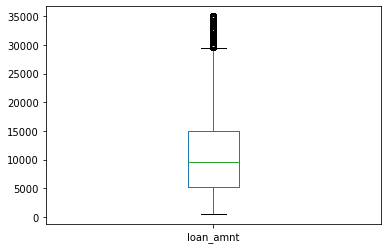

In [58]:
loan_df2['loan_amnt'].plot.box()

#### Observation
* Many values are out of max_range

#### Decision
* Let's understand how many values are outside max range

In [59]:
loan_df2[(loan_df2['loan_amnt']>30000)].shape

(735, 23)

In [60]:
loan_df2[(loan_df2['loan_amnt']>30000)&(loan_df2['loan_status']=='Charged Off')].shape

(180, 23)

#### Observation
* It seems there are many high loan amount and out of those there are several are "charged off"

#### Decsision
* for making further analysis, let's create a ordered categorical variable for loan_amount based on percentile

In [61]:
loan_df2['Loan_Amnt_Bucket']=pd.qcut(loan_df2['loan_amnt'], q=[0,0.2,0.4,0.6,0.8,1.0],
                                     labels=['Very_Low_Amnt_Loan','Low_Amnt_Loan','Mid_Amnt_Loan','High_Amnt_Loan',
                                             'Very_High_Amnt_Loan'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             38577 non-null  int64   
 1   term                  38577 non-null  category
 2   int_rate              38577 non-null  float64 
 3   installment           38577 non-null  float64 
 4   grade                 38577 non-null  category
 5   sub_grade             38577 non-null  category
 6   emp_title             38577 non-null  category
 7   emp_length            38577 non-null  category
 8   home_ownership        38577 non-null  category
 9   annual_inc            38577 non-null  float64 
 10  verification_status   38577 non-null  category
 11  issue_d               38577 non-null  object  
 12  loan_status           38577 non-null  category
 13  purpose               38577 non-null  category
 14  addr_state            38577 non-null  category
 15  dt

<AxesSubplot:>

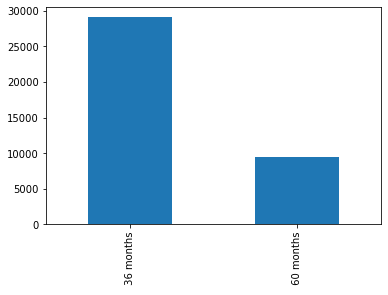

In [62]:
loan_df2['term'].value_counts().plot.bar()

#### Observation
* Most of the loans are of 36 months

In [63]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             38577 non-null  int64   
 1   term                  38577 non-null  category
 2   int_rate              38577 non-null  float64 
 3   installment           38577 non-null  float64 
 4   grade                 38577 non-null  category
 5   sub_grade             38577 non-null  category
 6   emp_title             38577 non-null  category
 7   emp_length            38577 non-null  category
 8   home_ownership        38577 non-null  category
 9   annual_inc            38577 non-null  float64 
 10  verification_status   38577 non-null  category
 11  issue_d               38577 non-null  object  
 12  loan_status           38577 non-null  category
 13  purpose               38577 non-null  category
 14  addr_state            38577 non-null  category
 15  dt

In [64]:
loan_df2['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

<AxesSubplot:ylabel='Frequency'>

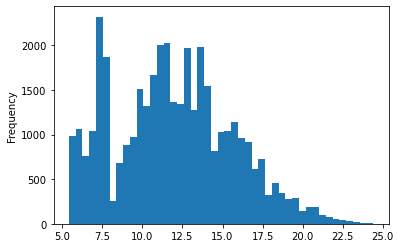

In [65]:
loan_df2['int_rate'].plot.hist(bins=45)

#### Observation 
* Majority of loan are around interest range of 7.0-7.5, 11.0-11.5 and 12.5-13.0 

In [66]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             38577 non-null  int64   
 1   term                  38577 non-null  category
 2   int_rate              38577 non-null  float64 
 3   installment           38577 non-null  float64 
 4   grade                 38577 non-null  category
 5   sub_grade             38577 non-null  category
 6   emp_title             38577 non-null  category
 7   emp_length            38577 non-null  category
 8   home_ownership        38577 non-null  category
 9   annual_inc            38577 non-null  float64 
 10  verification_status   38577 non-null  category
 11  issue_d               38577 non-null  object  
 12  loan_status           38577 non-null  category
 13  purpose               38577 non-null  category
 14  addr_state            38577 non-null  category
 15  dt

In [67]:
loan_df2['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

<AxesSubplot:ylabel='Frequency'>

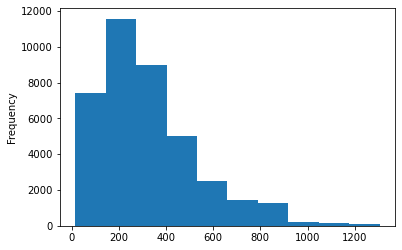

In [68]:
loan_df2['installment'].plot.hist()

#### Observation
* Installment in range of 200-400 a month

In [69]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             38577 non-null  int64   
 1   term                  38577 non-null  category
 2   int_rate              38577 non-null  float64 
 3   installment           38577 non-null  float64 
 4   grade                 38577 non-null  category
 5   sub_grade             38577 non-null  category
 6   emp_title             38577 non-null  category
 7   emp_length            38577 non-null  category
 8   home_ownership        38577 non-null  category
 9   annual_inc            38577 non-null  float64 
 10  verification_status   38577 non-null  category
 11  issue_d               38577 non-null  object  
 12  loan_status           38577 non-null  category
 13  purpose               38577 non-null  category
 14  addr_state            38577 non-null  category
 15  dt

<AxesSubplot:>

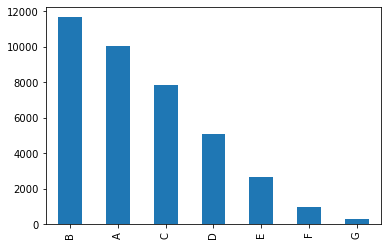

In [70]:
loan_df2['grade'].value_counts().plot.bar()

#### Observation
* Majority of applicants belong to B & A 

<AxesSubplot:>

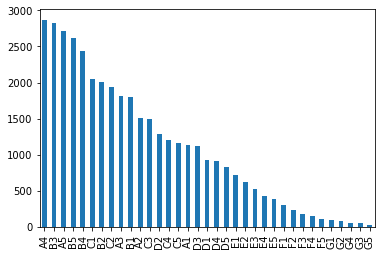

In [71]:
loan_df2['sub_grade'].value_counts().plot.bar()

#### Observation
* Majority of applicants belong to B3, A4, A5 and B4

In [72]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             38577 non-null  int64   
 1   term                  38577 non-null  category
 2   int_rate              38577 non-null  float64 
 3   installment           38577 non-null  float64 
 4   grade                 38577 non-null  category
 5   sub_grade             38577 non-null  category
 6   emp_title             38577 non-null  category
 7   emp_length            38577 non-null  category
 8   home_ownership        38577 non-null  category
 9   annual_inc            38577 non-null  float64 
 10  verification_status   38577 non-null  category
 11  issue_d               38577 non-null  object  
 12  loan_status           38577 non-null  category
 13  purpose               38577 non-null  category
 14  addr_state            38577 non-null  category
 15  dt

In [73]:
loan_df2['emp_title'].value_counts()

Missing_Emp_Title                2386
US Army                           131
Bank of America                   107
IBM                                65
AT&T                               57
                                 ... 
Somerset Academy Silver Palms       0
discovery world                     0
NiSource                            0
DOL Maint Div                       0
Dubuis Hospital                     0
Name: emp_title, Length: 28821, dtype: int64

#### Observation
* It seems 'emp_title' has long range of values; 
#### Assumption
* it may not be useful; for now let's proceed

<AxesSubplot:>

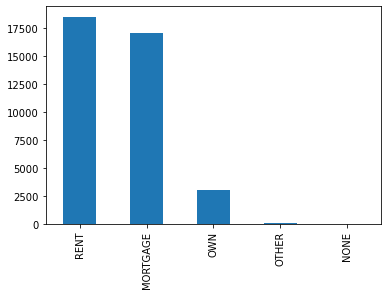

In [74]:
loan_df2['home_ownership'].value_counts().plot.bar()

#### Observation
* Majority of applicants belong to RENT and MORTGAGE home ownership category

In [75]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             38577 non-null  int64   
 1   term                  38577 non-null  category
 2   int_rate              38577 non-null  float64 
 3   installment           38577 non-null  float64 
 4   grade                 38577 non-null  category
 5   sub_grade             38577 non-null  category
 6   emp_title             38577 non-null  category
 7   emp_length            38577 non-null  category
 8   home_ownership        38577 non-null  category
 9   annual_inc            38577 non-null  float64 
 10  verification_status   38577 non-null  category
 11  issue_d               38577 non-null  object  
 12  loan_status           38577 non-null  category
 13  purpose               38577 non-null  category
 14  addr_state            38577 non-null  category
 15  dt

In [76]:
loan_df2['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:>

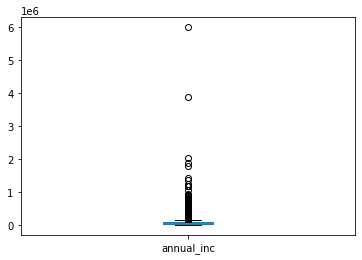

In [77]:
loan_df2['annual_inc'].plot.box()

#### Observation
* There seems to be several outliers 

In [78]:
loan_df2[(loan_df2['annual_inc']>500000)].shape

(66, 24)

In [79]:
loan_df2[(loan_df2['annual_inc']>500000) & (loan_df2['loan_status']=='Charged Off')].shape

(11, 24)

#### Observation
* Though there are outliers of income; but their loan status shows 'charged off' as well

#### Decision
* Let's create ordered annual income categorical variable for future analysis rather than dropping outliers

In [80]:
loan_df2['Income_Bucket']=pd.qcut(loan_df2['annual_inc'], q=[0,0.2,0.4,0.6,0.8,1.0],
                                     labels=['Very_Low_Income','Low_Income','Mid_Income','High_Income',
                                             'Very_High_Income'])

In [81]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             38577 non-null  int64   
 1   term                  38577 non-null  category
 2   int_rate              38577 non-null  float64 
 3   installment           38577 non-null  float64 
 4   grade                 38577 non-null  category
 5   sub_grade             38577 non-null  category
 6   emp_title             38577 non-null  category
 7   emp_length            38577 non-null  category
 8   home_ownership        38577 non-null  category
 9   annual_inc            38577 non-null  float64 
 10  verification_status   38577 non-null  category
 11  issue_d               38577 non-null  object  
 12  loan_status           38577 non-null  category
 13  purpose               38577 non-null  category
 14  addr_state            38577 non-null  category
 15  dt

<AxesSubplot:>

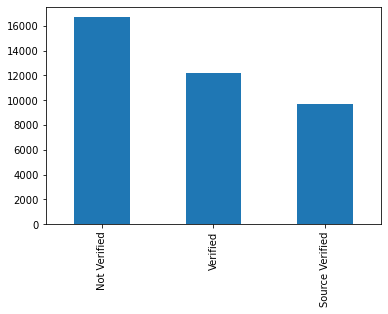

In [82]:
loan_df2['verification_status'].value_counts().plot.bar()

#### Observation
* About 50% of the applicants income source is not verified

<AxesSubplot:>

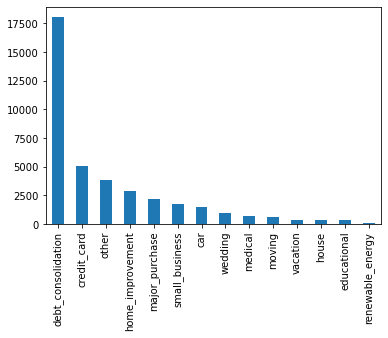

In [83]:
loan_df2['purpose'].value_counts().plot.bar()

#### Observation
* About 50% of the applicants are taking loan for their debt consolidation

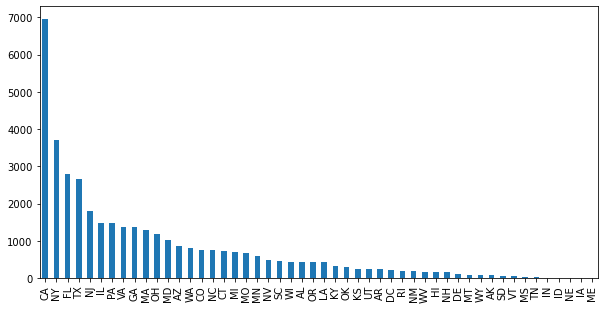

In [84]:
plt.figure(figsize=(10,5)) 
loan_df2['addr_state'].value_counts().plot.bar()
plt.show()

#### Observation
* About 20% of applicants are from CA 

In [85]:
loan_df2['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

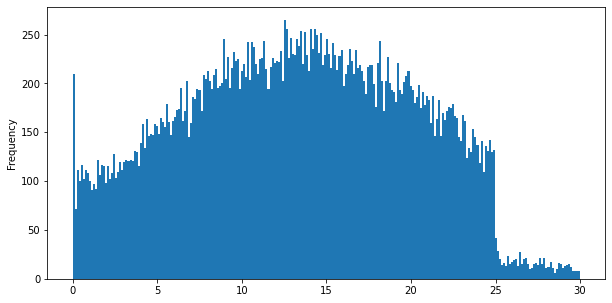

In [86]:
plt.figure(figsize=(10,5)) 
loan_df2['dti'].plot.hist(bins=250)
plt.show()

In [87]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             38577 non-null  int64   
 1   term                  38577 non-null  category
 2   int_rate              38577 non-null  float64 
 3   installment           38577 non-null  float64 
 4   grade                 38577 non-null  category
 5   sub_grade             38577 non-null  category
 6   emp_title             38577 non-null  category
 7   emp_length            38577 non-null  category
 8   home_ownership        38577 non-null  category
 9   annual_inc            38577 non-null  float64 
 10  verification_status   38577 non-null  category
 11  issue_d               38577 non-null  object  
 12  loan_status           38577 non-null  category
 13  purpose               38577 non-null  category
 14  addr_state            38577 non-null  category
 15  dt

In [88]:
loan_df2['inq_last_6mths'].describe()

count    38577.000000
mean         0.871737
std          1.071546
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

<AxesSubplot:ylabel='Frequency'>

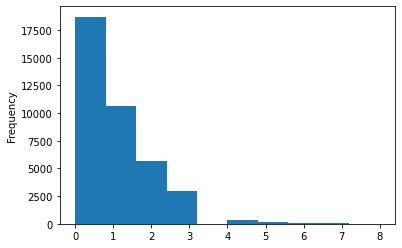

In [89]:
loan_df2['inq_last_6mths'].plot.hist()

#### Observation
* many applicants are first timer

In [90]:
loan_df2['open_acc'].describe()

count    38577.000000
mean         9.275423
std          4.401588
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

<AxesSubplot:ylabel='Frequency'>

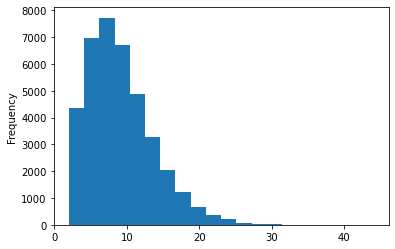

In [91]:
loan_df2['open_acc'].plot.hist(bins=20)

#### Observaton
* About two thirs applicants has open accounts in range of 5~10 

In [92]:
loan_df2['pub_rec_bankruptcies'].describe()

count    38577.000000
mean         0.042694
std          0.202809
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

<AxesSubplot:ylabel='Frequency'>

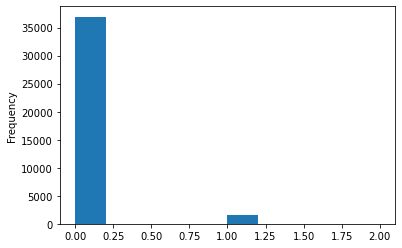

In [93]:
loan_df2['pub_rec_bankruptcies'].plot.hist()

#### Observation
* this columns seems to have no useful information
#### Decision
* lets' ignore it

<AxesSubplot:>

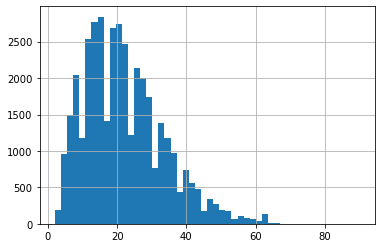

In [94]:
loan_df2['total_acc'].hist(bins=50)

In [95]:
loan_df2['pub_rec'].describe()

count    38577.000000
mean         0.055422
std          0.237804
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

<AxesSubplot:ylabel='Frequency'>

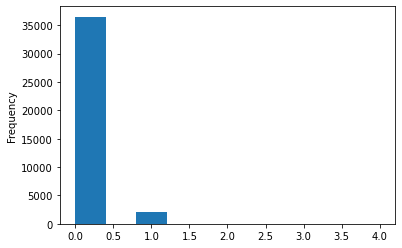

In [96]:
loan_df2['pub_rec'].plot.hist()

## 4.2 Bivariate Analysis

### 4.2.1 Continuous vs Continuous

In [97]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             38577 non-null  int64   
 1   term                  38577 non-null  category
 2   int_rate              38577 non-null  float64 
 3   installment           38577 non-null  float64 
 4   grade                 38577 non-null  category
 5   sub_grade             38577 non-null  category
 6   emp_title             38577 non-null  category
 7   emp_length            38577 non-null  category
 8   home_ownership        38577 non-null  category
 9   annual_inc            38577 non-null  float64 
 10  verification_status   38577 non-null  category
 11  issue_d               38577 non-null  object  
 12  loan_status           38577 non-null  category
 13  purpose               38577 non-null  category
 14  addr_state            38577 non-null  category
 15  dt

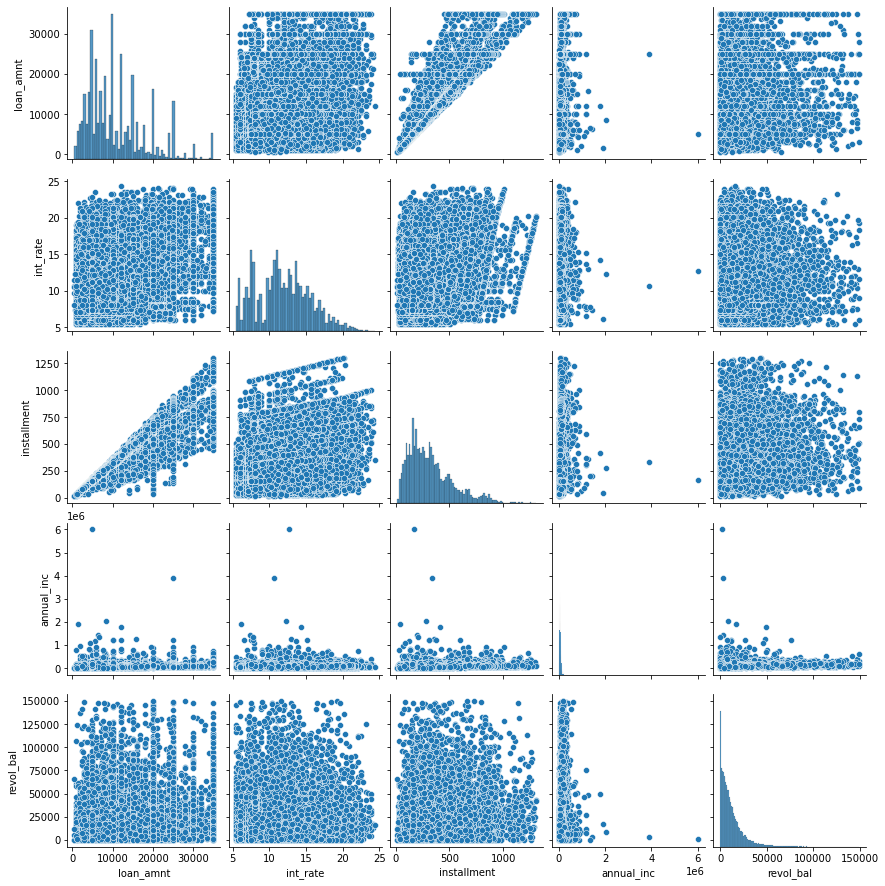

In [98]:
sns.pairplot(data=loan_df2[['loan_amnt','int_rate','installment','annual_inc','revol_bal']])

#### Observation
* Low income applicants are asking for higher loan amount

In [99]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             38577 non-null  int64   
 1   term                  38577 non-null  category
 2   int_rate              38577 non-null  float64 
 3   installment           38577 non-null  float64 
 4   grade                 38577 non-null  category
 5   sub_grade             38577 non-null  category
 6   emp_title             38577 non-null  category
 7   emp_length            38577 non-null  category
 8   home_ownership        38577 non-null  category
 9   annual_inc            38577 non-null  float64 
 10  verification_status   38577 non-null  category
 11  issue_d               38577 non-null  object  
 12  loan_status           38577 non-null  category
 13  purpose               38577 non-null  category
 14  addr_state            38577 non-null  category
 15  dt

### 4.2.2 Target variable viz. loan_status vs other features

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

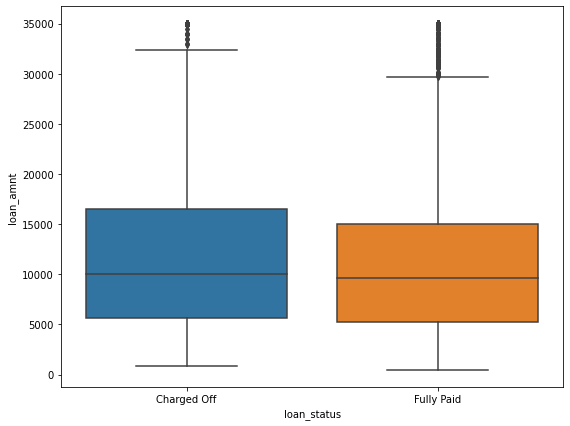

In [124]:
plt.figure(figsize=[9,7])
sns.boxplot(loan_df2['loan_status'],loan_df2['loan_amnt'])

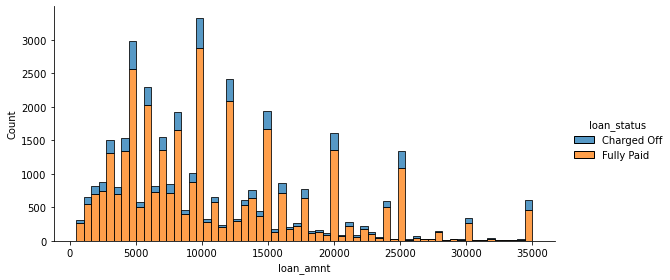

In [255]:
#what is the distribution of loan_amnt vs loan_status (count)
sns.displot(data=loan_df2, x='loan_amnt', hue='loan_status', multiple='stack',height=4, aspect=2)

#### Observation
* More number of applicants are taking loan around multiple of 5000
* Charged Off is higher around multiples

#### Assumption
* Applicants seems taking loan more than their need;

#### Recommendation
* Bank shall validate purpose and need vs loan amount before approval

<AxesSubplot:xlabel='term', ylabel='term_proportion'>

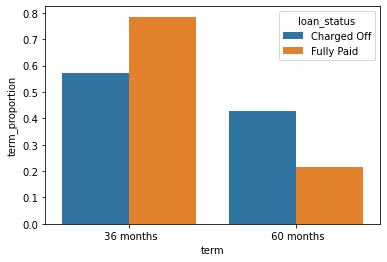

In [239]:
#what is the relationship w.r.t. loan_status vs term of loan
#sns.displot(data=loan_df2, x='term', hue='loan_status', multiple='stack',height=4, aspect=2)
y="term_proportion"
(loan_df2['term']
 .groupby(loan_df2['loan_status'])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x='term', y=y, hue='loan_status'))

#### Observation
* Higher count of charged off for 36 months loan

In [242]:
loan_df2['Int_Rate_Bucket']=pd.qcut(loan_df2['int_rate'], q=[0,0.2,0.4,0.6,0.8,1.0],
                                     labels=['Very_Low_Int_Rate','Low_Int_Rate','Mid_Int_Rate','High_Int_Rate',
                                             'Very_High_Int_Rate'])

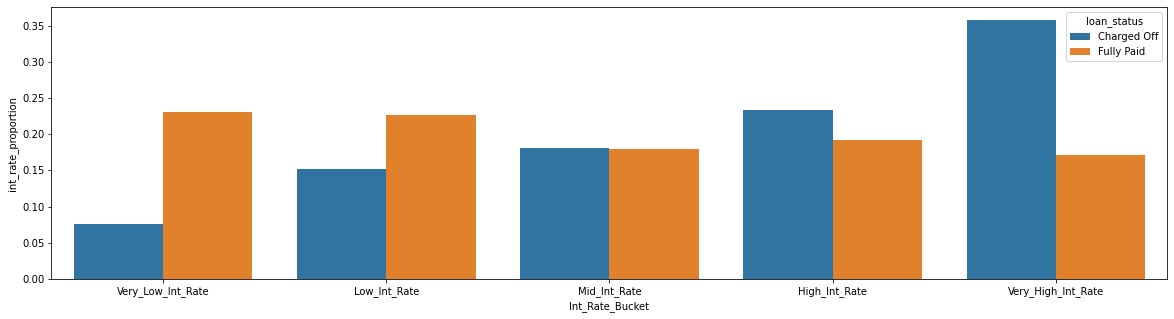

In [245]:
#what is the relationship w.r.t. loan_status vs int_rate
#sns.displot(data=loan_df2, x='int_rate', hue='loan_status', multiple='stack',height=4, aspect=4)
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 5))
y="int_rate_proportion"
(loan_df2['Int_Rate_Bucket']
 .groupby(loan_df2['loan_status'])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x='Int_Rate_Bucket', y=y, hue='loan_status'))
plt.show()

#### Observation
* Ratio of Charged Off is higher for int_rate 11% or higher

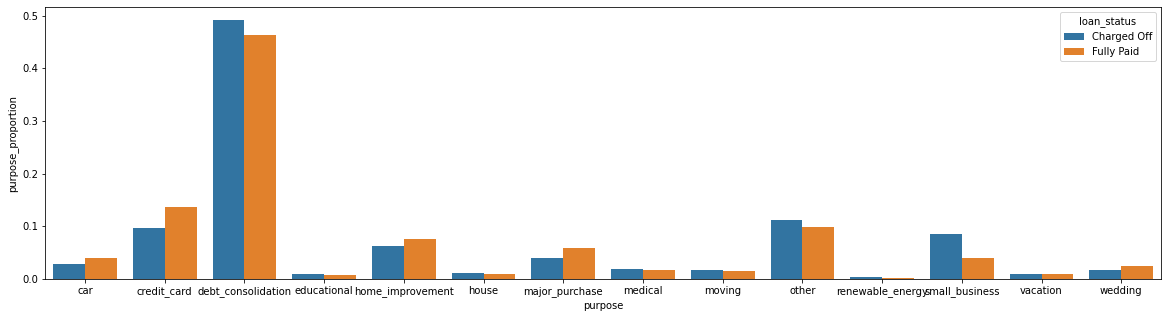

In [246]:
#what is the relationship w.r.t. purpose vs int_rate
#sns.displot(data=loan_df2, x='purpose', hue='loan_status', multiple='stack',height=8, aspect=3)
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 5))
y="purpose_proportion"
(loan_df2['purpose']
 .groupby(loan_df2['loan_status'])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x='purpose', y=y, hue='loan_status'))
plt.show()

#### Observation
* debt_consolidation seems to highest ratio of Charged off

#### Recommendation
* Request for Debt consolidation need more scrutening about history of loan seeker

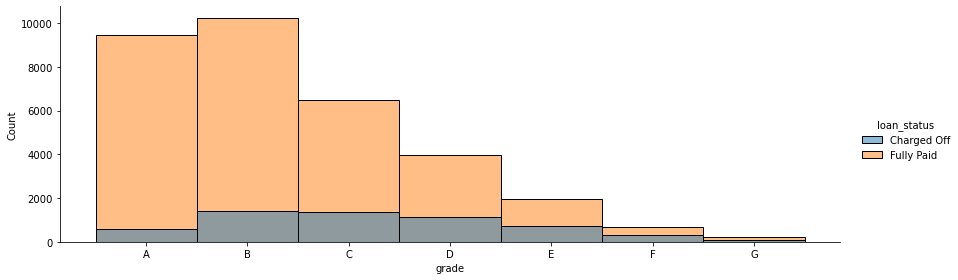

In [225]:
#what is the relationship w.r.t. grade vs loan_status
sns.displot(data=loan_df2, x='grade', hue='loan_status', height=4, aspect=3)

<AxesSubplot:xlabel='grade', ylabel='grade_proportion'>

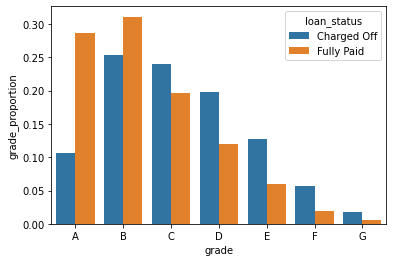

In [226]:
y="grade_proportion"
(loan_df2['grade']
 .groupby(loan_df2['loan_status'])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x='grade', y=y, hue='loan_status'))

#### Observation
* Grade B applicatns are highest 
* Ratio of charged off is high among them

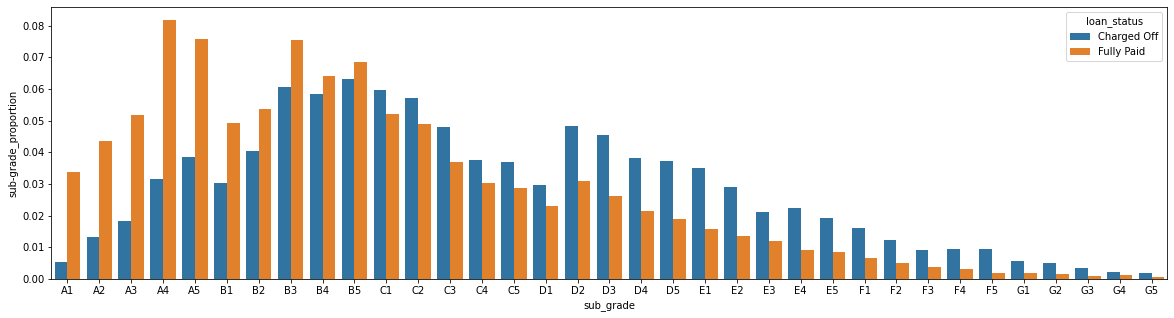

In [238]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 5))
y="sub-grade_proportion"
(loan_df2['sub_grade']
 .groupby(loan_df2['loan_status'])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x='sub_grade', y=y, hue='loan_status'))
 
plt.show()

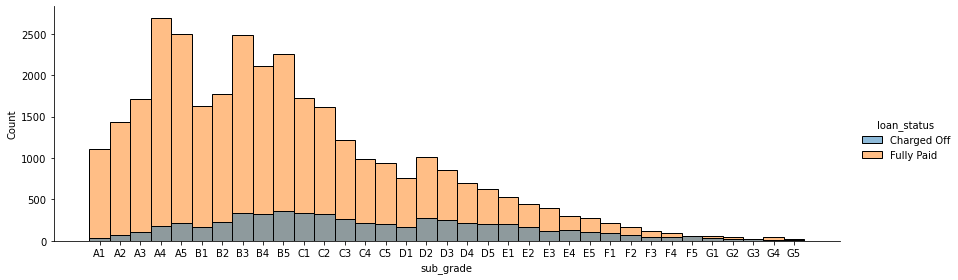

In [224]:
#what is the relationship w.r.t. subgrade vs loan_status
sns.displot(data=loan_df2, x='sub_grade', hue='loan_status', height=4, aspect=3)

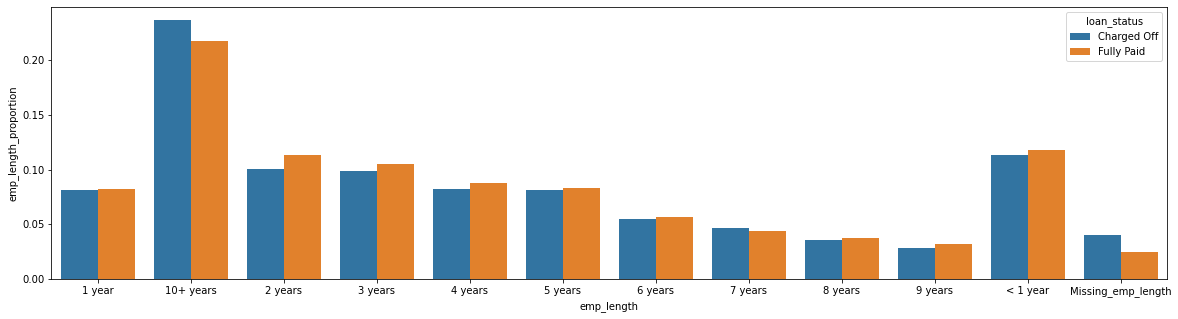

In [249]:
#what is the relationship w.r.t. emp_length vs loan_status
#sns.displot(data=loan_df2, x='emp_length', hue='loan_status', multiple='stack',height=4, aspect=3)
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 5))
y="emp_length_proportion"
(loan_df2['emp_length']
 .groupby(loan_df2['loan_status'])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x='emp_length', y=y, hue='loan_status'))
 
plt.show()

#### Observation
* Applicants with less than 1 year and more than 10 years are seeking more loan
* Their charge-off is also high

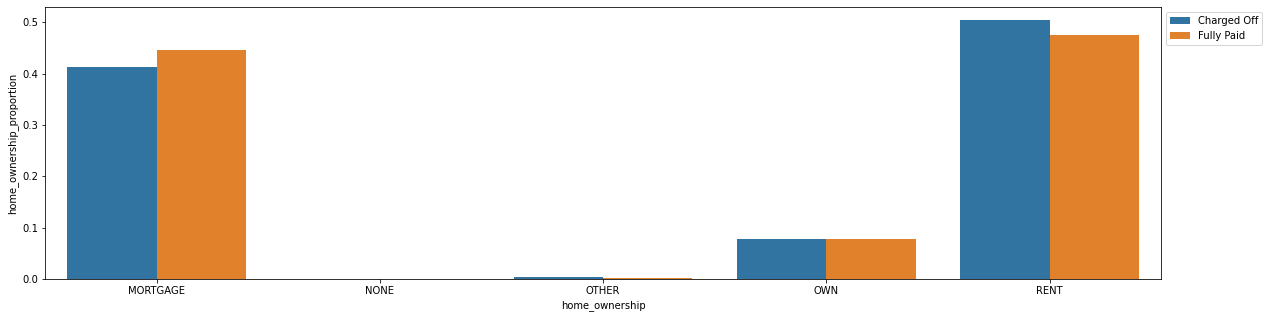

In [252]:
#what is the relationship w.r.t. home_ownership vs loan_status
#sns.displot(data=loan_df2, x='home_ownership', hue='loan_status', multiple='stack',height=4, aspect=3)
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 5))
y="home_ownership_proportion"
(loan_df2['home_ownership']
 .groupby(loan_df2['loan_status'])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x='home_ownership', y=y, hue='loan_status'))
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

#### Observation
* More number of applicants are staying either in rented or mortgage home

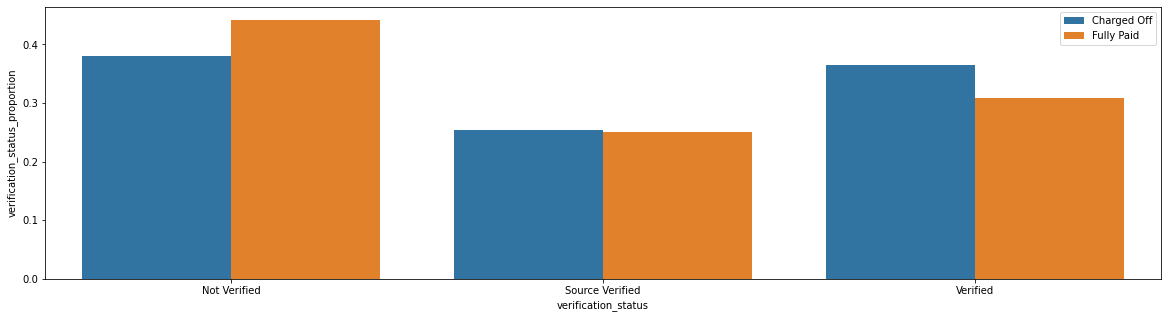

In [253]:
#what is the relationship w.r.t. verification_status vs loan_status
#sns.displot(data=loan_df2, x='verification_status', hue='loan_status', multiple='stack',height=4, aspect=3)
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 5))
y="verification_status_proportion"
(loan_df2['verification_status']
 .groupby(loan_df2['loan_status'])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x='verification_status', y=y, hue='loan_status'))
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

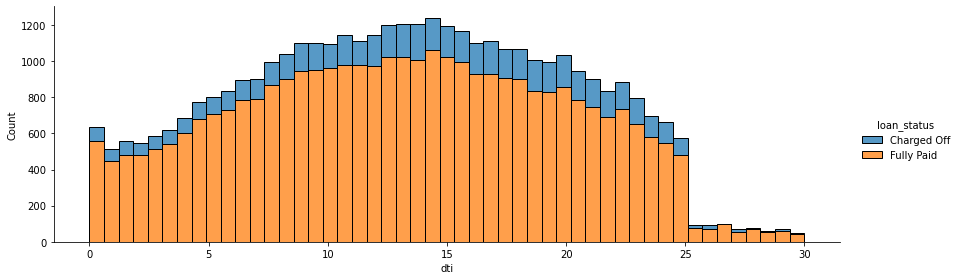

In [194]:
#what is the relationship w.r.t. dti vs loan_status
sns.displot(data=loan_df2, x='dti', hue='loan_status', multiple='stack',height=4, aspect=3)

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

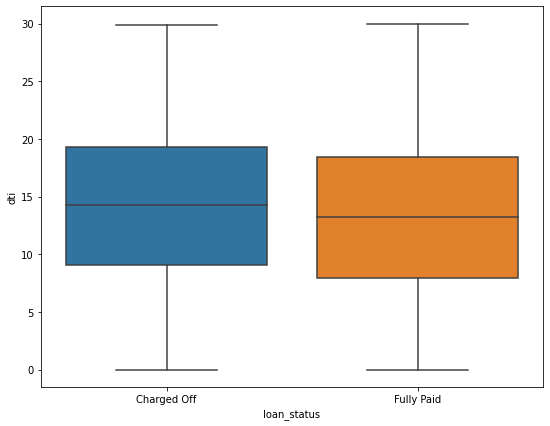

In [195]:
plt.figure(figsize=[9,7])
sns.boxplot(loan_df2['loan_status'],loan_df2['dti'])

#### Insight
* Charge off is high among the applicants who already has dti > 9

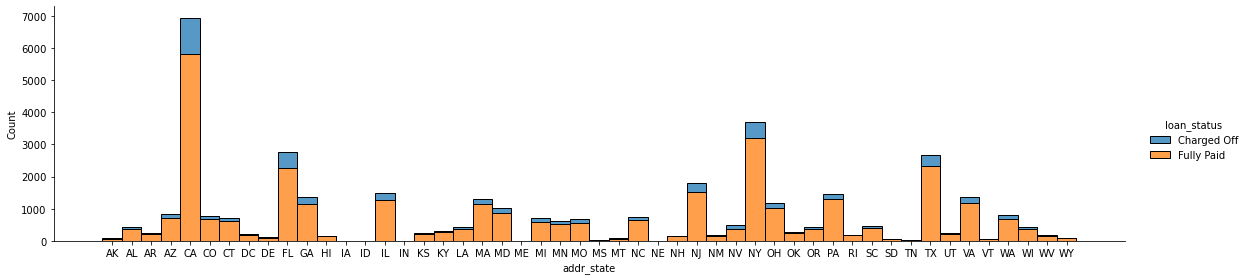

In [204]:
#what is the relationship w.r.t. state vs loan_status
sns.displot(data=loan_df2, x='addr_state', hue='loan_status', multiple='stack',height=4, aspect=4)


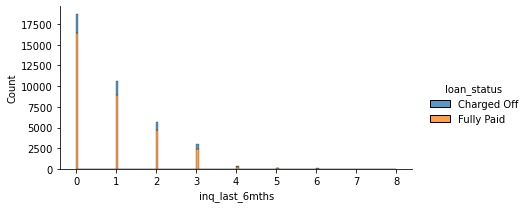

In [207]:
#what is the relationship w.r.t. inq_last_6mths vs loan_status
sns.displot(data=loan_df2, x='inq_last_6mths', hue='loan_status', multiple='stack',height=3, aspect=2)

#### Observation
* It seems more loans are allocatted where inquiry in last 6 months is less than 5

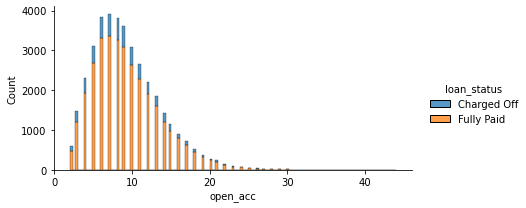

In [208]:
#what is the relationship w.r.t. open_acc vs loan_status
sns.displot(data=loan_df2, x='open_acc', hue='loan_status', multiple='stack',height=3, aspect=2)

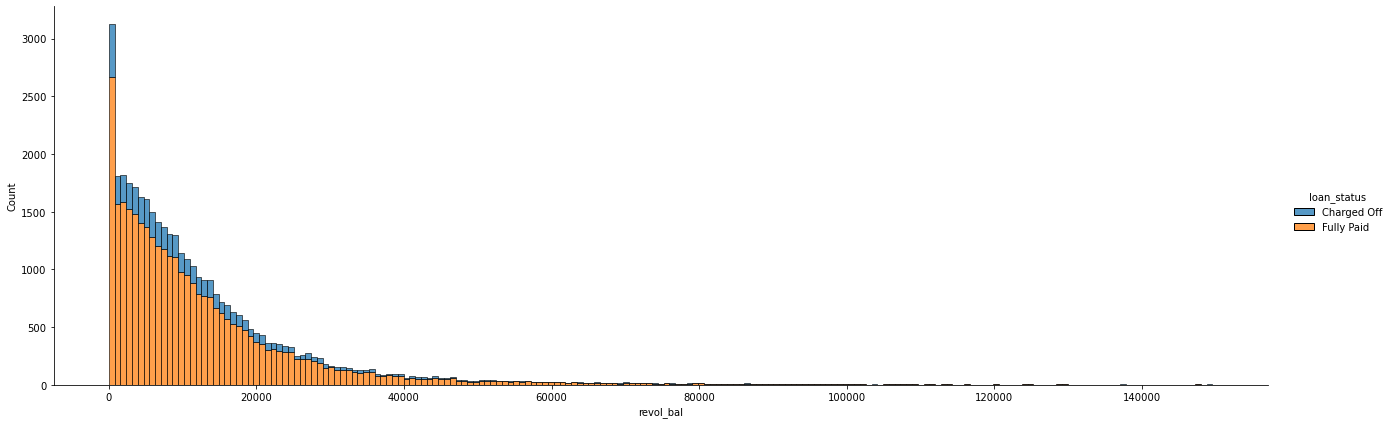

In [214]:
#what is the relationship w.r.t. revol_bal  vs loan_status
sns.displot(data=loan_df2, x='revol_bal', hue='loan_status', multiple='stack',height=6, aspect=3)

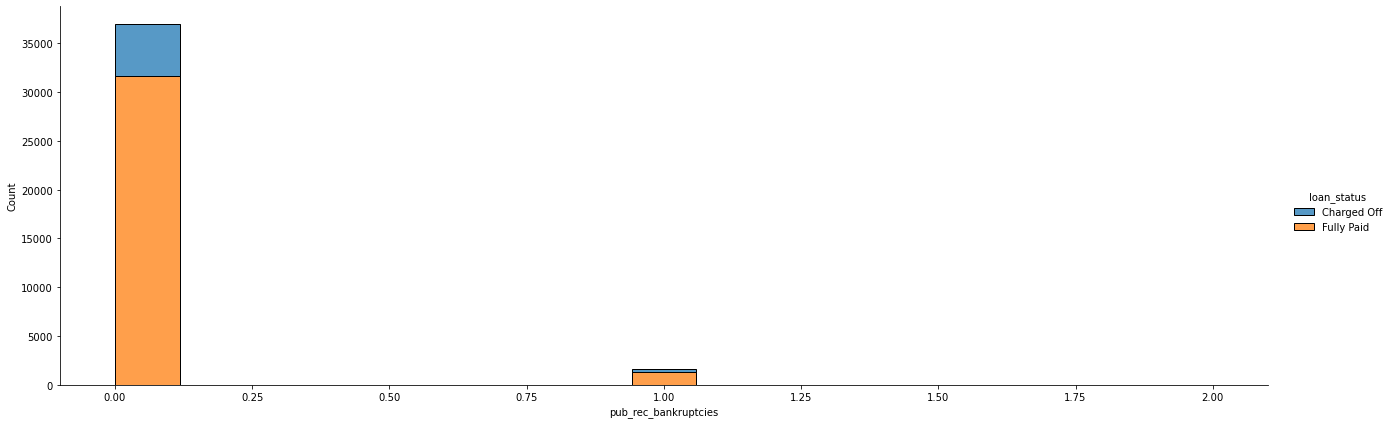

In [215]:
#what is the relationship w.r.t. pub_rec_bankruptcies  vs loan_status
sns.displot(data=loan_df2, x='pub_rec_bankruptcies', hue='loan_status', multiple='stack',height=6, aspect=3)

### 4.2.3 Target variable viz. loan_status vs narrow Segments

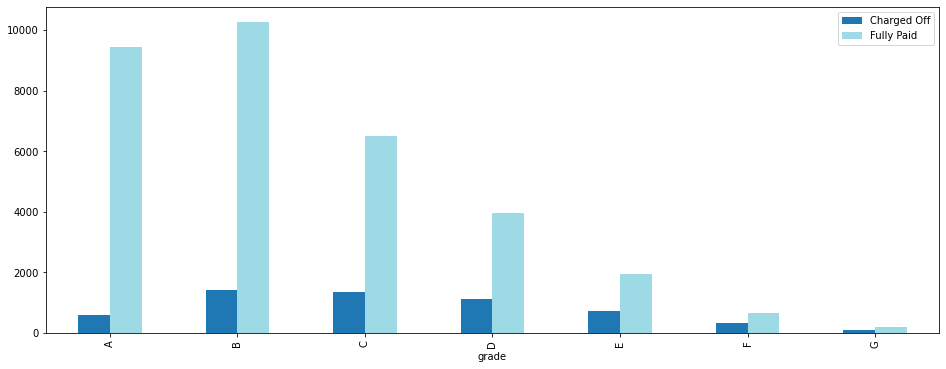

In [223]:
#what is the safe loan_amount based on grade of applicant
loan_status_vs_loan_amount_vs_grade = pd.pivot_table(data=loan_df2, index='grade', columns='loan_status',
                                                         values='loan_amnt', aggfunc='count')
loan_status_vs_loan_amount_vs_grade.plot(kind='bar', stacked=False, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

<AxesSubplot:xlabel='Income_Bucket', ylabel='loan_amnt'>

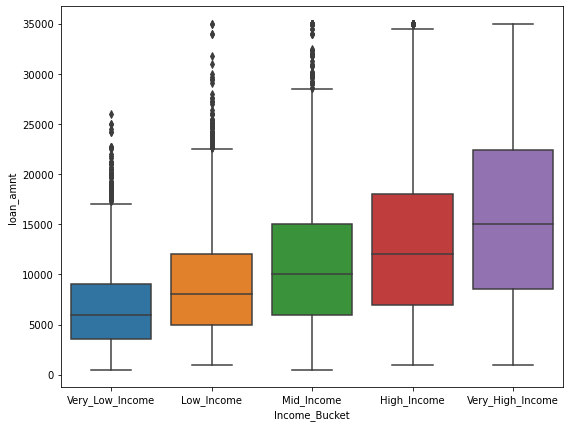

In [125]:
plt.figure(figsize=[9,7])
sns.boxplot(loan_df2['Income_Bucket'],loan_df2['loan_amnt'])

<AxesSubplot:xlabel='emp_length', ylabel='loan_amnt'>

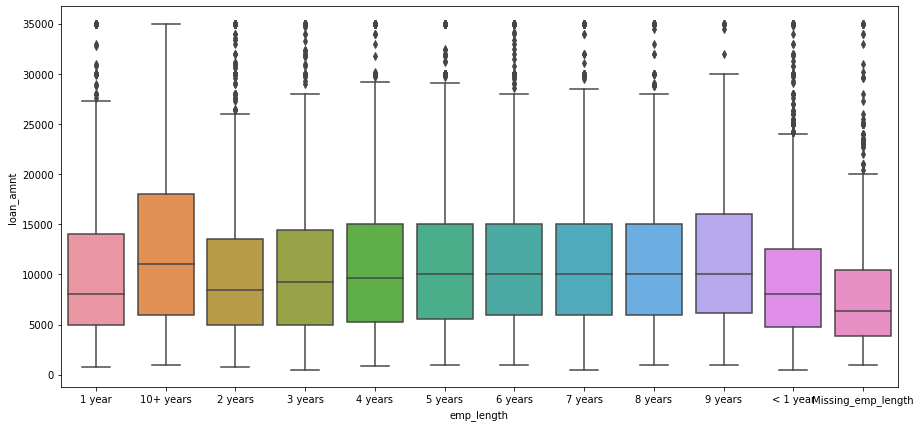

In [145]:
plt.figure(figsize=[15,7])
sns.boxplot(loan_df2['emp_length'],loan_df2['loan_amnt'])

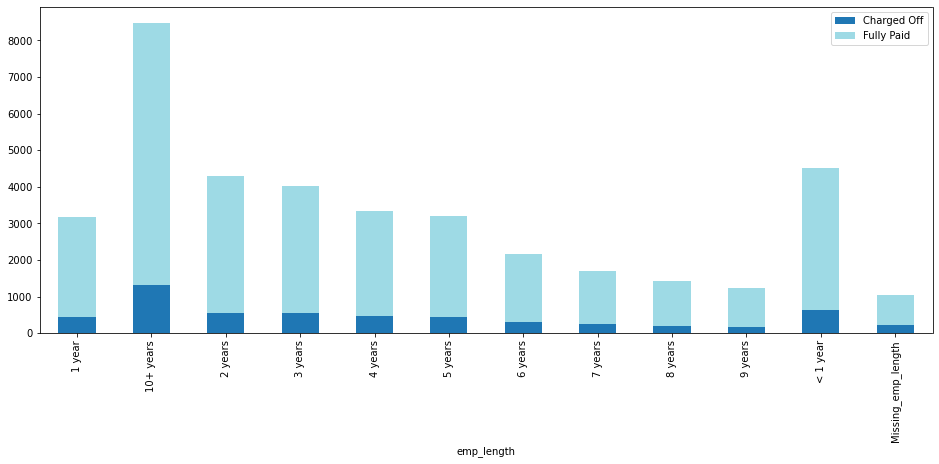

In [147]:
#who are defaulting loans by employment length
loan_status_vs_employment_length = pd.pivot_table(data=loan_df2, index='emp_length', columns='loan_status', values='loan_amnt', aggfunc='count')
loan_status_vs_employment_length.plot(kind='bar', stacked=True, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

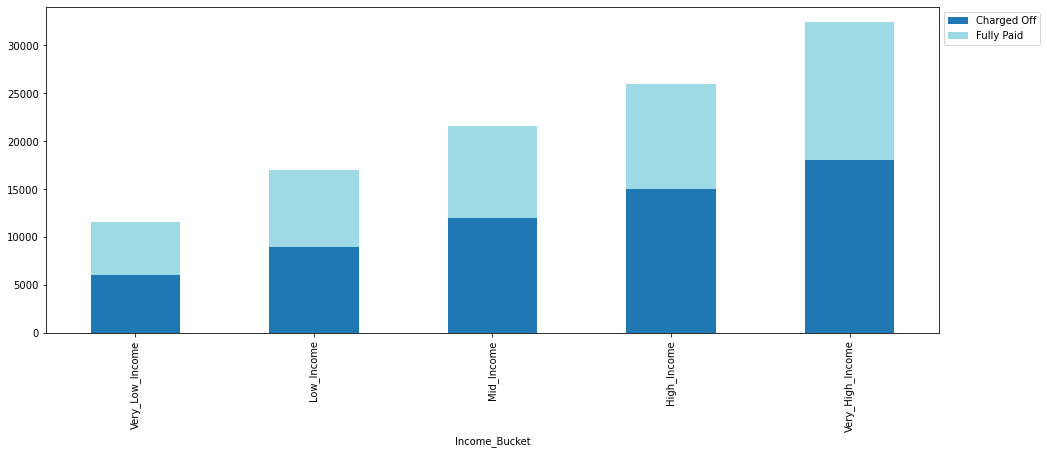

In [163]:
#who are defaulting loans by Income Bucket (count)
loan_status_vs_loan_amount = pd.pivot_table(data=loan_df2, index='Income_Bucket', columns='loan_status', values='loan_amnt', aggfunc=np.median)
loan_status_vs_loan_amount.plot(kind='bar', stacked=True, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

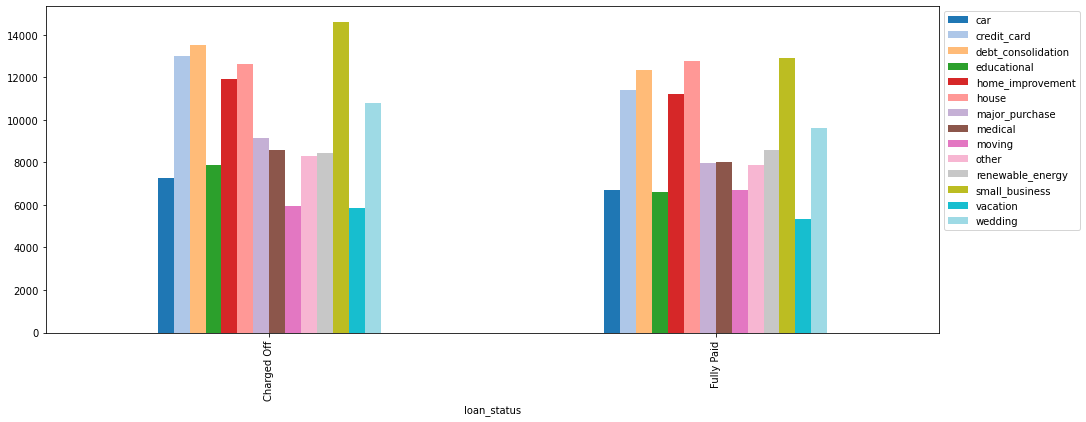

In [139]:
#what is the relationship among loan_amnt, loan purpose vs loan_status
income_vs_loan_purpose = pd.pivot_table(data=loan_df2, index='loan_status', columns='purpose', values='loan_amnt')
income_vs_loan_purpose.plot(kind='bar', stacked=False, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

In [ ]:
#what is the CIBIL score

In [ ]:
#what is the history of previous loans

In [ ]:
#what is the relationship for number of dependents or number of member making income